=== Original Dataset ===
  Flower_Name   Color  Average_Height_cm   Scent Bloom_Season  Petal_Shape
0    Marigold  Orange          46.904409  Strong       Winter  Star-shaped
1        Rose   White                NaN  Strong       Spring         Oval
2    Lavender  Purple          43.703547     NaN       Winter    Elongated
3      Orchid  Purple          34.045330     NaN         Fall         Oval
4      Orchid   White          30.982787  Strong       Winter         Oval

=== Checking for Missing Values ===
Flower_Name           192
Color                 193
Average_Height_cm     208
Scent                1120
Bloom_Season          212
Petal_Shape           187
dtype: int64

=== Dataset After Dropping Rows with NaN ===
  Flower_Name   Color  Average_Height_cm   Scent Bloom_Season  Petal_Shape
0    Marigold  Orange          46.904409  Strong       Winter  Star-shaped
4      Orchid   White          30.982787  Strong       Winter         Oval
5   Sunflower  Yellow         150.254042  Strong

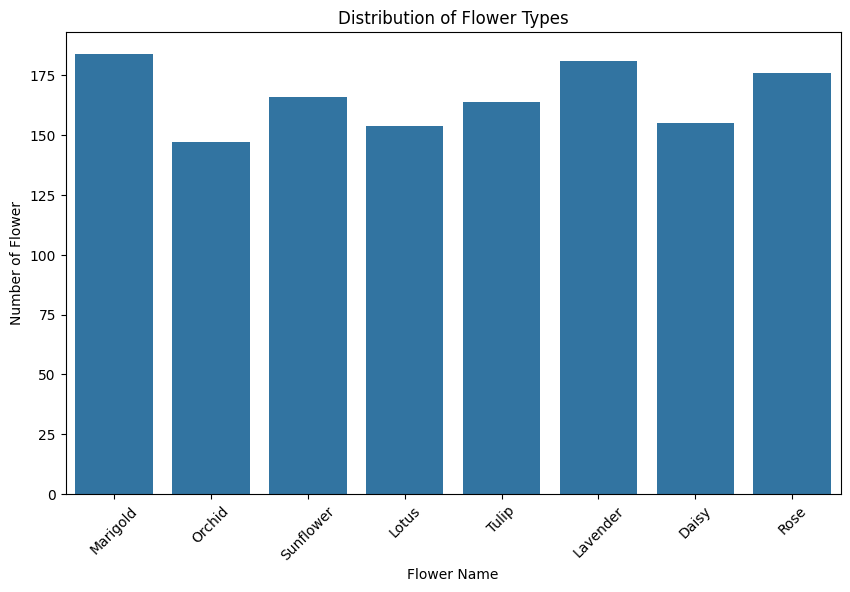

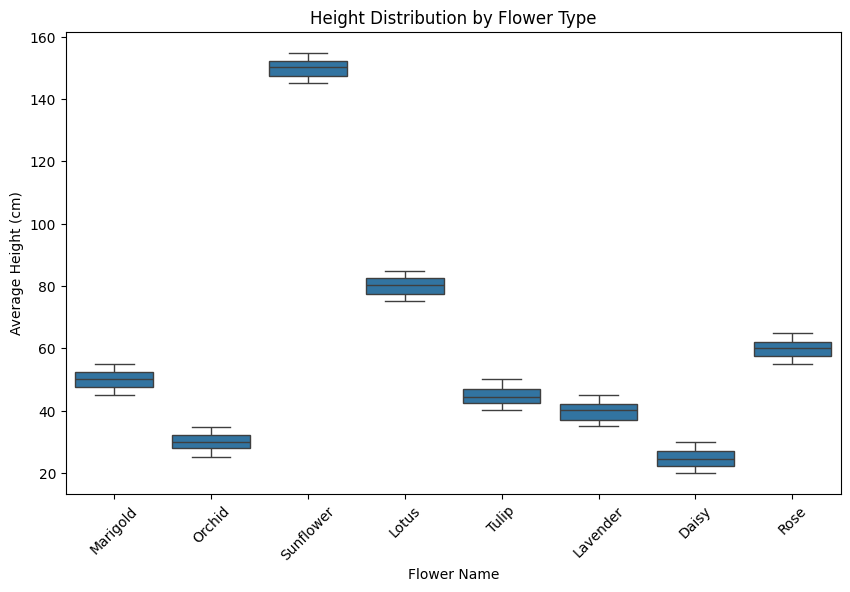

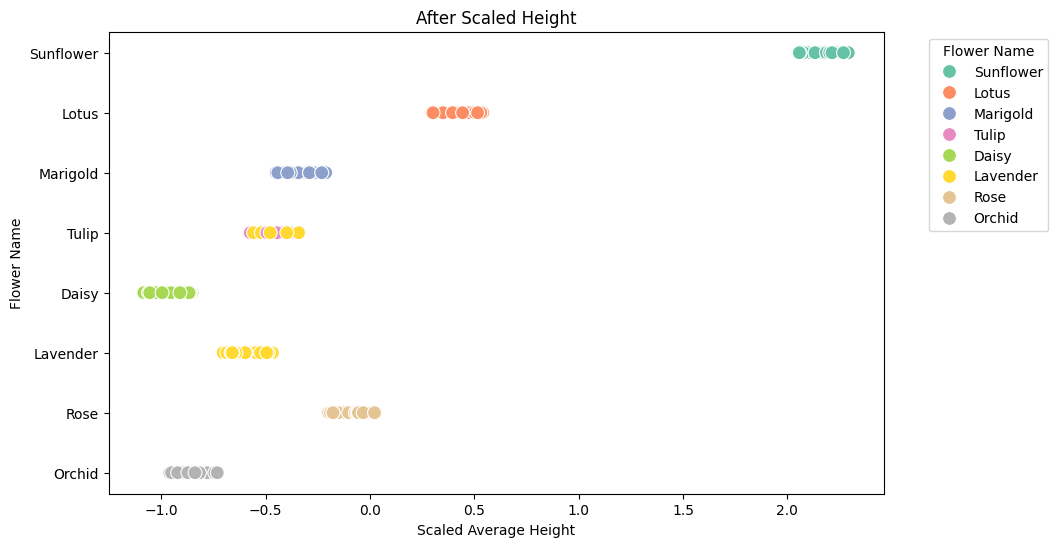


=== SVM Results ===
Accuracy: 95.49%

Classification Report:
              precision    recall  f1-score   support

       Daisy       1.00      1.00      1.00        43
    Lavender       0.74      1.00      0.85        50
       Lotus       1.00      1.00      1.00        55
    Marigold       1.00      1.00      1.00        53
      Orchid       1.00      1.00      1.00        42
        Rose       1.00      1.00      1.00        50
   Sunflower       1.00      1.00      1.00        52
       Tulip       1.00      0.67      0.80        54

    accuracy                           0.95       399
   macro avg       0.97      0.96      0.96       399
weighted avg       0.97      0.95      0.95       399


=== KNN Results ===
Accuracy: 96.24%

Classification Report:
              precision    recall  f1-score   support

       Daisy       1.00      1.00      1.00        43
    Lavender       0.80      0.94      0.86        50
       Lotus       1.00      1.00      1.00        55
    Mari

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('flowers_petal_shape_dataset.csv')

# Data Formatting
print("=== Original Dataset ===")
print(df.head())
print("\n=== Checking for Missing Values ===")
print(df.isnull().sum())

# Drop rows with any NaN values and overwrite to df
original_size = df.shape[0]
df = df.dropna()
print("\n=== Dataset After Dropping Rows with NaN ===")
print(df.head())
print("\n=== Checking for Missing Values Again===")
print(df.isnull().sum())
print("\n")

# Count Plot for Flower_Name
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Flower_Name')
plt.title('Distribution of Flower Types')
plt.xlabel('Flower Name')
plt.ylabel('Number of Flower')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Average_Height_cm by Flower_Name
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Flower_Name', y='Average_Height_cm')
plt.title('Height Distribution by Flower Type')
plt.xlabel('Flower Name')
plt.ylabel('Average Height (cm)')
plt.xticks(rotation=45)
plt.show()

# Separate features (X) and label (y)
X = df.drop('Flower_Name', axis=1)
y = df['Flower_Name']

# Encode Categorical Features
categorical_cols = ['Color', 'Scent', 'Bloom_Season', 'Petal_Shape']
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Encode the Label (Target Variable)
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# Normalize Numerical Feature
scaler = StandardScaler()
X['Average_Height_cm'] = scaler.fit_transform(X[['Average_Height_cm']])

# Scatter Plot after Normalize Numerical Feature
plt.figure(figsize=(10, 6))
test_df = X_test.copy()
test_df['Actual'] = le_y.inverse_transform(y_test)
test_df['Predicted_SVM'] = le_y.inverse_transform(y_pred_svm)
sns.scatterplot(data=test_df, x='Average_Height_cm', y='Actual', hue='Predicted_SVM', palette='Set2', s=100)
plt.title('After Scaled Height')
plt.xlabel('Scaled Average Height')
plt.ylabel('Flower Name')
plt.legend(title='Flower Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Split Data into Training (70%) and Testing Sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('\n=== SVM Results ===')
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le_y.classes_))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print('\n=== KNN Results ===')
print(f"Accuracy: {knn_accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le_y.classes_))

